Any mass can lead to a gravitational potential in 3-D (x-y-z) space
\begin{equation}
\nabla^2\Phi=4\pi G\rho
\end{equation}
    

We will set G=1 for this problem.  
Please solve the potential of a line mass 
(i.e. one zone at x=50, y=50 with nonzero density and all others with zero density) 
using SOR. Since the problem has symmetry in the Z direction:
\begin{equation}
\nabla^2\Phi=\frac{\partial^2\Phi}{\partial^2 x}+\frac{\partial^2\Phi}{\partial^2y}
\end{equation}


The domain is X from 0 to 100, Y from 0 to 100. $\Delta$x= $\Delta$y=1. (assume $\Phi=0$
at the boundary and $\rho_{50,50}$ is always 1)

Please verify that the potential has radial dependence close to 2*G*$\mu$*ln(r)+constant. 
Where $\mu$ is its mass per unit length and r is the distance to the line mass. 



### Solution:

\begin{equation}
du_{i,j}=\frac{1}{4}(V_{i+1,j}+V_{i-1,j}+V_{i,j+1}+V_{i,j-1})-\pi h^2 G \rho_{i,j}-V_{i,j}
\end{equation}
\begin{equation}
V^*_{i,j}=V_{i,j}+du_{i,j}
\end{equation}

In /home/cjs16/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/cjs16/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/cjs16/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/cjs16/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/cjs16/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylel

Initializing
0
3.141592653589793
1.413716694115407
1.2723450247038663
0.8588328916751098
0.7729496025075988
0.579712201880699
0.5217409816926292
0.4108710230829455
0.36978392077465094
0.2995249758274673
10
0.2695724782447206
0.22239729455189447
0.20015756509670501
0.1672745365451035
0.15054708289059315
0.12702410118893798
0.11432169107004418
0.09717343740953756
0.0874560936685838
0.07477496008663914
20
0.06729746407797522
0.05781463959426054
0.052033175634834485
0.044878613985044745
0.04039075258654027
0.03495353589219831
0.03145818230297848
0.027301208212942036
0.024571087391647834
0.021376846030733615
30
0.0200685924525843
0.01925868117950058
0.018656941545204253
0.01796494382314706
0.017444404750322162
0.016843876954285353
0.016388410872057113
0.015870160542546863
0.015458397844652527
0.015005738080432707
40
0.014631748662373045
0.014233814952343327
0.013891277259362234
0.013538253170005454
0.01322362241687225
0.012907131305265995
0.012618190594924972
0.012332067938648716
0.01206644

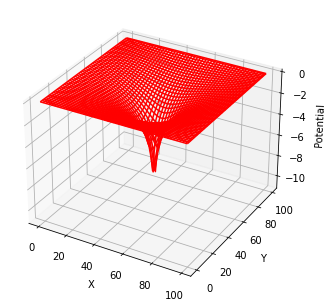

In [3]:
import matplotlib.pylab as p;
from mpl_toolkits.mplot3d import Axes3D
from numpy import *;
import numpy;
print("Initializing")
omega=1.8
Nmax = 100; Niter = 3000; V = zeros((Nmax, Nmax), float)   

rho = zeros((Nmax, Nmax), float)    
rho[49,49]=1.0                                    #rho= zero everywhere except (50,50)
    
for iter in range(Niter):                                  
    if iter%10 == 0: print(iter)
    maxerr=0.
    for i in range(1, Nmax-1):                                                
        for j in range(1,Nmax-1): 
            du = 1/4*(V[i+1,j]+V[i-1,j]+V[i,j+1]+V[i,j-1])-numpy.pi*rho[i,j]-V[i,j]  #h and G are =1
            if(maxerr<abs(du)):
                maxerr=abs(du)
            V[i,j]=V[i,j]+omega*du                    # updating V[i,j]
    print(maxerr)
    if(maxerr<1.e-3):
        break
            
x = range(0, Nmax, 1)
y = range(0, Nmax, 1)                              
X, Y = p.meshgrid(x,y)                 

def functz(V):                                         # V(x, y) 
    z = V[X,Y]                        
    return z

Z = functz(V)                          
fig = p.figure()                                      # Create figure
ax = Axes3D(fig)                                      # Plot axes
ax.plot_wireframe(X, Y, Z, color = 'r')               # Red wireframe
ax.set_xlabel('X')                                     
ax.set_ylabel('Y')
ax.set_zlabel('Potential')
p.show()                                              # Show fig

#### Please verify that the potential has radial dependence close to 2G 𝜇 *ln(r)+constant. Where  𝜇  is its mass per unit length and r is the distance to the line mass.

/home/cjs16/.local/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  


<function matplotlib.pyplot.show(close=None, block=None)>

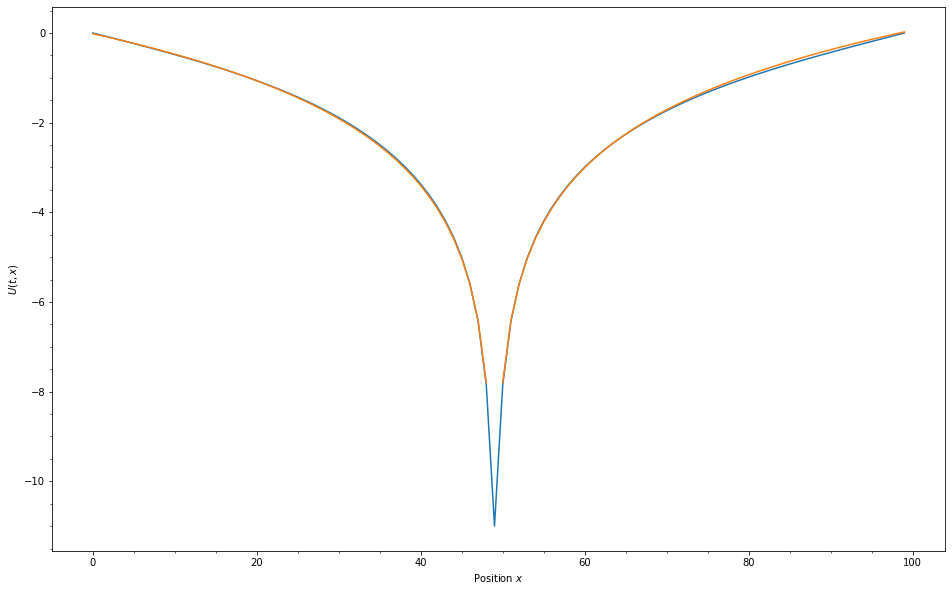

In [58]:
import matplotlib.pyplot as plt

def functs(V):                                         # V(x, y) 
    z = V[x,49]                        
    return z

Z50 = functs(V) 

x1=numpy.arange(0, 51, 1)
x2=abs(numpy.arange(-49, 0, 1))

xf=numpy.append(x2,x1)

zf=2*numpy.log(xf)-7.8


fig = plt.figure(figsize=(16,10))
ax = fig.gca()
ax.set_xlabel(r"Position $x$")
ax.set_ylabel(r"$U(t,x)$")
ax.minorticks_on()
plt.plot(x,Z50)
plt.plot(x,zf)
plt.show

The orange line is the $ln(r)$ function and you can see that is matches V(x,y) almost exactly (measured along a straight line through (50,50)).